# Risk Addjusted Retuns


In [91]:
import pandas as pd
import numpy as np

In [92]:
prices = pd.read_csv('data/sample_prices.csv')
print("DF Shape: ", prices.shape)
prices.head()

DF Shape:  (13, 2)


,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070


In [93]:
# Returns = percentage change
returns = prices.pct_change()
returns = returns.dropna()
#volatility = standard deviation of returns
volatility = returns.std()
#anualized vol = vol * sqrt(number of periods in a year)
anualized_vol = volatility * np.sqrt(12)

## Real Life dataset

In [94]:
#Importing dataset: returns on portfolions formes on ME monthly
returns = pd.read_csv('data/Portfolios_Formed_on_ME_monthly_EW.csv',
                     header = 0,
                     index_col = 0,
                     parse_dates = True,
                     na_values = -99.99
                     )

returns.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [95]:
#Preparing dataset: Low 10% and Hi 10% of marektcap 
columns = ['Lo 10', 'Hi 10']
returns = returns[columns]
returns.columns = ['Small cap', 'Large cap']
returns = returns / 100
returns.head()

,Small cap,Large cap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


<AxesSubplot:>

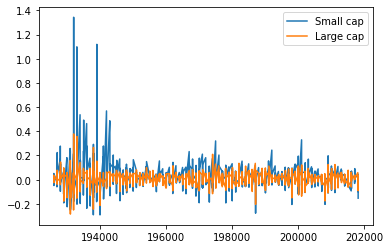

In [96]:
#Plotting returns
returns.plot.line()

In [97]:
#calculating volatility and anualized volatilty
vol = returns.std()
annualized_vol = vol * np.sqrt(12)
print("Vol for small cap: ", vol[0], "\nVol for Large Cap: ", vol[1])
print("Anualized Vol for small cap: ", 
      anualized_vol[0], "\nAnualized_Vol for Large Cap: ", anualized_vol[1])

Vol for small cap:  0.10628817804909393 
Vol for Large Cap:  0.05390026289280418
Anualized Vol for small cap:  0.08306021186963347 
Anualized_Vol for Large Cap:  0.27574688095412925


In [98]:
#Anualizing Retruns
no_of_months = returns.shape[0]
total_returns = (returns+1).prod() -1
returns_per_month = (returns+1).prod() ** (1/no_of_months) -1

#annualized return = (returns +1).prod() ** (no_of_periods/ no_of_months) -1
annualized_return = (returns + 1).prod() ** (12/no_of_months) -1
annualized_return

Small cap    0.167463
Large cap    0.092810
dtype: float64

In [99]:
# Return to risk ratio
annualized_return / annualized_vol

Small cap    0.454825
Large cap    0.497063
dtype: float64

In [100]:
#Calcualting Sharpe Ratio

riskfree_rate= 0.03
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return / annualized_vol
sharpe_ratio

Small cap    0.373346
Large cap    0.336392
dtype: float64

# Max Drawdown
### Worst possible scenario

### Compute Drawdowns

1. compute a welth index
2. compute previous peaks
3. Compute drawdowns - Wealth value as a percentage of the previous peak

In [101]:
#Processing data: Converting to Time Series
returns.index = pd.to_datetime(returns.index, format = "%Y%m")
returns.index = returns.index.to_period('M')
returns.head()

,Small cap,Large cap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


<AxesSubplot:>

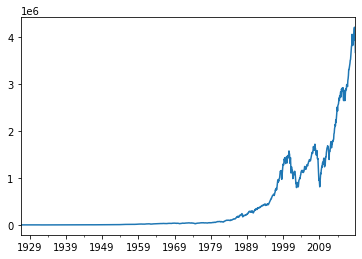

In [109]:
#calculating wealth index (starting off with $1000)
wealth_index = 1000 * (1+ returns["Large cap"]).cumprod()
wealth_index.plot()

<AxesSubplot:>

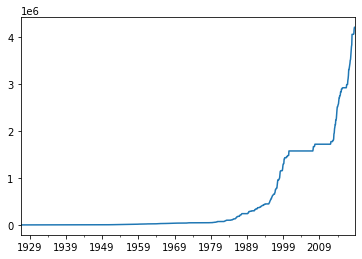

In [110]:
#Comuting previous peaks
previous_peaks = wealth_index.cummax()
previous_peaks.plot()

<AxesSubplot:>

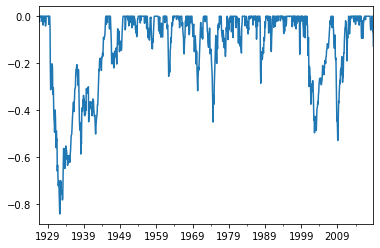

In [111]:
# Calculating Drawdown
drawdown = (wealth_index - previous_peaks) / previous_peaks
drawdown.plot()

In [116]:
#Max Drawdown
print("max drawdown: ", drawdown.idxmin())
#Max Drawdown since 1975
print("Max drawdown since 1975: ", drawdown['1975':].idxmin())

max drawdown:  1932-05
Max drawdown since 1975:  2009-02


In [117]:
#Drawdown Function
def drawdown(return_series: pd.Series):
    wealth_index = 1000 * (1+ return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks) / previous_peaks
    return pd.DataFrame({
        "Wealth Index": wealth_index,
        "Peaks": previous_peaks,
        "Drawdown": drawdowns
    })
    

In [121]:
drawdown(returns["Small cap"]).head()

,Wealth Index,Peaks,Drawdown
1926-07,985.500000,985.500000,0.000000
1926-08,1035.957600,1035.957600,0.000000
1926-09,1045.592006,1045.592006,0.000000
1926-10,994.985353,1045.592006,-0.048400
1926-11,987.224467,1045.592006,-0.055822
